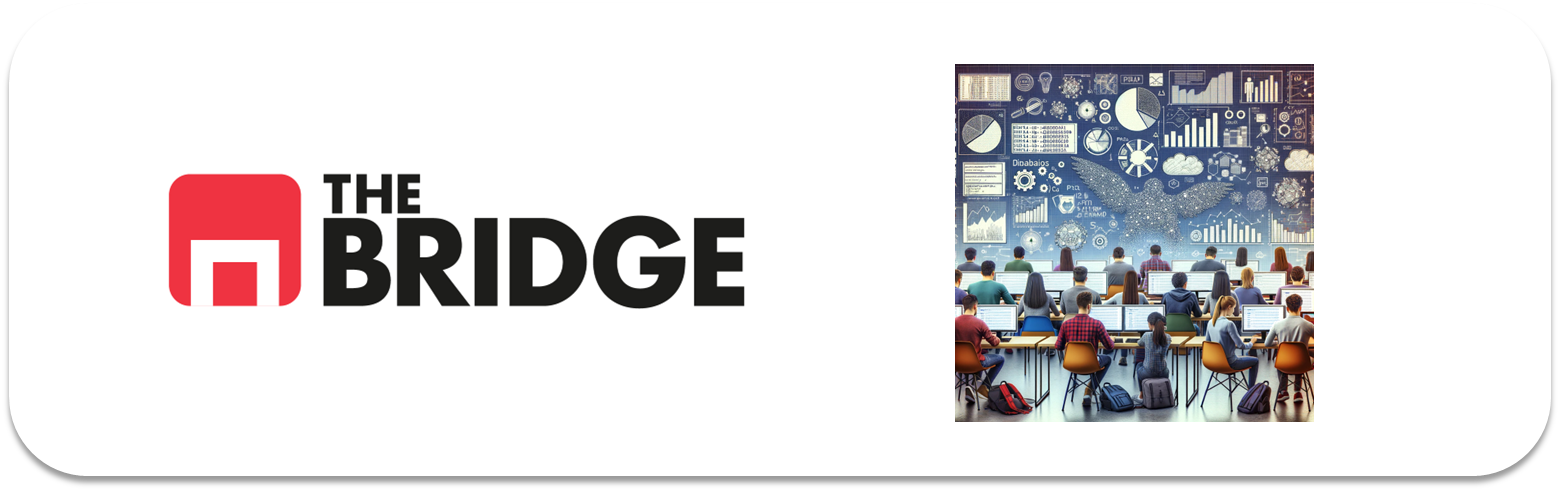

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [2]:
#1. Carga del dataset
import pandas as pd

df = pd.read_csv("data/hard_to_find/obligatoria_hard.csv", sep="|")
df.columns = df.columns.str.strip()

# Vista previa
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Distribución del valor medio de las viviendas (MEDV)')

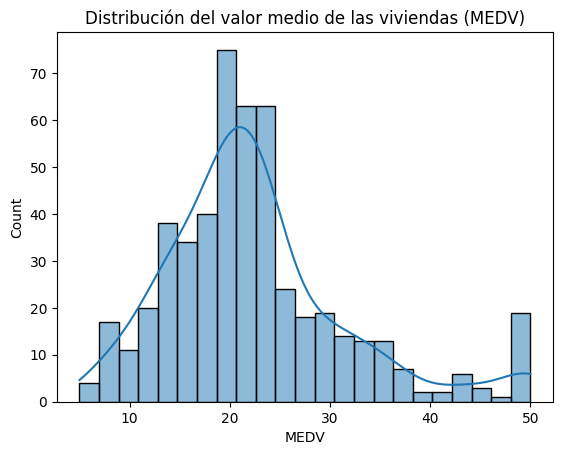

In [12]:
#2. Análisis de la variable target
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x="MEDV", data= df, kde=True)
plt.title("Distribución del valor medio de las viviendas (MEDV)")


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
df.sample(10, random_state=42)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,17.27,16.1
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,11.97,20.0
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,18.33,17.8
140,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,24.16,14.0
471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,12.87,19.6
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,14.33,16.8


In [15]:
#3+4. División entre train y test
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [16]:
# 5. Mini EDA y selección de features
np.abs(train_set.corr(numeric_only= True)["MEDV"]).sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.736422
RM         0.710680
PTRATIO    0.491210
INDUS      0.470546
TAX        0.459795
NOX        0.415768
RAD        0.387467
CRIM       0.380091
AGE        0.340216
ZN         0.309504
DIS        0.235114
CHAS       0.190642
Name: MEDV, dtype: float64

In [17]:
corr = train_set.corr(numeric_only= True)

In [18]:
corr["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

In [19]:
serie_corr = np.abs(corr["MEDV"]).sort_values(ascending=False)
serie_corr

MEDV       1.000000
LSTAT      0.736422
RM         0.710680
PTRATIO    0.491210
INDUS      0.470546
TAX        0.459795
NOX        0.415768
RAD        0.387467
CRIM       0.380091
AGE        0.340216
ZN         0.309504
DIS        0.235114
CHAS       0.190642
Name: MEDV, dtype: float64

In [23]:
train_set["CHAS"].value_counts()

CHAS
0.0    375
1.0     29
Name: count, dtype: int64

In [22]:
criterio = 0.31
serie_corr > criterio

MEDV        True
LSTAT       True
RM          True
PTRATIO     True
INDUS       True
TAX         True
NOX         True
RAD         True
CRIM        True
AGE         True
ZN         False
DIS        False
CHAS       False
Name: MEDV, dtype: bool

In [24]:
criterio = 0.31
features_num = serie_corr[serie_corr > criterio].index.to_list()
features_num.remove("MEDV")
features_num.remove("RAD")

In [25]:
features_num

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE']

In [ ]:
# Colinealidad
train_set[features_num].corr(numeric_only=True)

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,CRIM,AGE
LSTAT,1.000000,-0.612577,0.360167,0.603644,0.530632,0.593862,0.414142,0.571051
RM,-0.612577,1.000000,-0.342643,-0.398690,-0.281127,-0.299615,-0.200303,-0.210863
PTRATIO,0.360167,-0.342643,1.000000,0.348303,0.444836,0.161253,0.288970,0.240841
INDUS,0.603644,-0.398690,0.348303,1.000000,0.702353,0.770957,0.400198,0.636569
TAX,0.530632,-0.281127,0.444836,0.702353,1.000000,0.650247,0.576894,0.471670
NOX,0.593862,-0.299615,0.161253,0.770957,0.650247,1.000000,0.396406,0.720417
CRIM,0.414142,-0.200303,0.288970,0.400198,0.576894,0.396406,1.000000,0.334090
AGE,0.571051,-0.210863,0.240841,0.636569,0.471670,0.720417,0.334090,1.000000


In [ ]:
criterio_col = 0.7
excluidas = []
corr_numeric = train_set[features_num].corr(numeric_only = True)

for col in features_num:
    print(f"Comprobando colinealidad de {col}")
    if col not in excluidas:
        for col_2, valor_corr in corr_numeric[col].items():
            print(f"\tComprobando {col} con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"\t\t--> {col} correla con {col_2} al {valor_corr:0.4f}, EXCLUIMOS {col_2} <--")
                    excluidas.append(col_2)
                else:
                    print(f"\t\t{col} correla con {col_2} al {valor_corr:0.4f}, mantenemos {col_2}")
            elif col == col_2:
                print("\t\tSon la misma variable, no comprobamos")
    
    elif col in excluidas:
        print(f"\tLa columna {col} ya ha sido excluida")

excluidas = list(set(excluidas))
print("\nLas variables a excluir son", excluidas)

Comprobando colinealidad de LSTAT
	Comprobando LSTAT con LSTAT
		Son la misma variable, no comprobamos
	Comprobando LSTAT con RM
		LSTAT correla con RM al -0.6126, mantenemos RM
	Comprobando LSTAT con PTRATIO
		LSTAT correla con PTRATIO al 0.3602, mantenemos PTRATIO
	Comprobando LSTAT con INDUS
		LSTAT correla con INDUS al 0.6036, mantenemos INDUS
	Comprobando LSTAT con TAX
		LSTAT correla con TAX al 0.5306, mantenemos TAX
	Comprobando LSTAT con NOX
		LSTAT correla con NOX al 0.5939, mantenemos NOX
	Comprobando LSTAT con CRIM
		LSTAT correla con CRIM al 0.4141, mantenemos CRIM
	Comprobando LSTAT con AGE
		LSTAT correla con AGE al 0.5711, mantenemos AGE
Comprobando colinealidad de RM
	Comprobando RM con LSTAT
		RM correla con LSTAT al -0.6126, mantenemos LSTAT
	Comprobando RM con RM
		Son la misma variable, no comprobamos
	Comprobando RM con PTRATIO
		RM correla con PTRATIO al -0.3426, mantenemos PTRATIO
	Comprobando RM con INDUS
		RM correla con INDUS al -0.3987, mantenemos INDUS
	Comp

In [29]:
for excluida in excluidas:
    features_num.remove(excluida)

features_num

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE']

<Axes: >

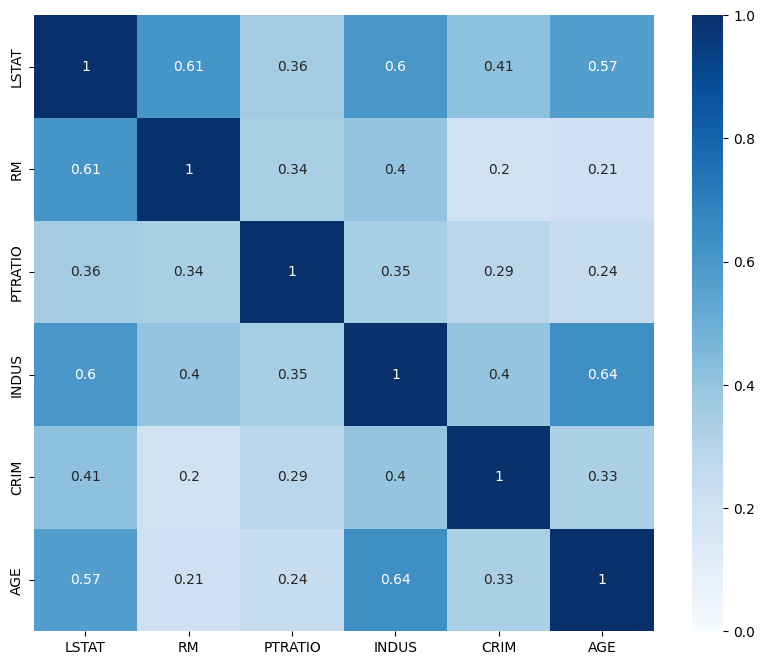

In [30]:
plt.figure(figsize= (10,8))
sns.heatmap(np.abs(train_set[features_num].corr(numeric_only = True)), annot= True, cmap= "Blues", vmin=0, vmax=1)

In [31]:
features_cat = ["CMAS", "RAD"]

<Axes: xlabel='MEDV', ylabel='Count'>

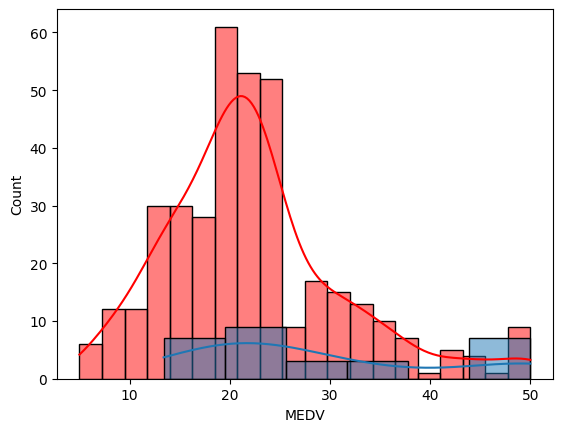

In [32]:
sns.histplot(x = "MEDV", data= train_set[train_set.CHAS == 0], kde= True, color = "red")
sns.histplot(x = "MEDV", data= train_set[train_set.CHAS == 1], kde=True)

In [33]:
train_set.RAD.value_counts(normalize=True)

RAD
24.0    0.250000
5.0     0.232673
4.0     0.198020
3.0     0.079208
6.0     0.056931
2.0     0.051980
8.0     0.051980
1.0     0.042079
7.0     0.037129
Name: proportion, dtype: float64

<Axes: xlabel='MEDV', ylabel='Count'>

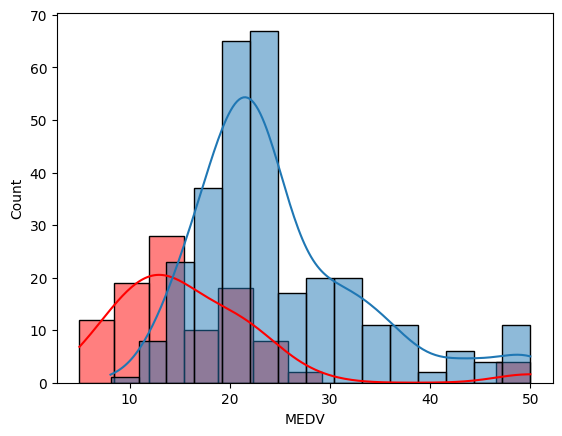

In [35]:
sns.histplot(x = "MEDV", data= train_set[train_set.RAD == 24], kde= True, color = "red")
sns.histplot(x = "MEDV", data= train_set[train_set.RAD != 24], kde=True)

In [36]:
features_num

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE']

In [37]:
features_cat

['CMAS', 'RAD']

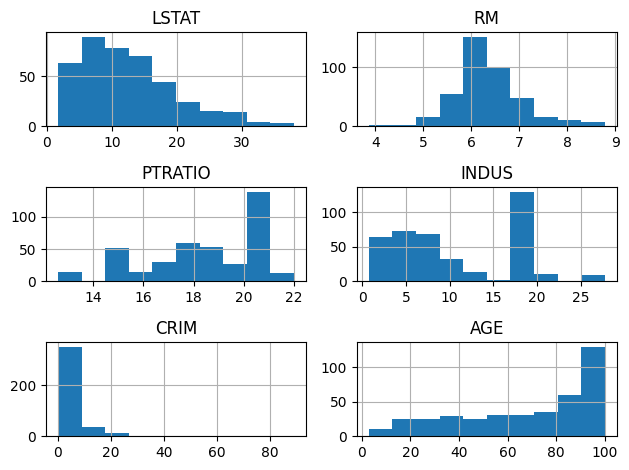

In [38]:
# Procesamos las numéricas

train_set[features_num].hist()
plt.tight_layout()

In [39]:
train_bck = train_set.copy()

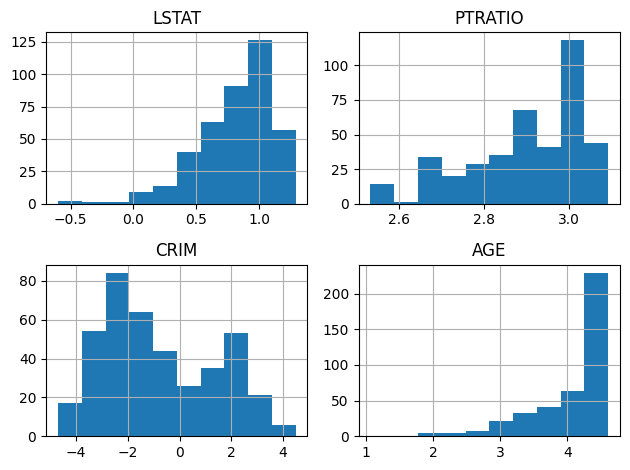

In [41]:
features_transform = ["LSTAT", "PTRATIO", "CRIM", "AGE"]

for feature in features_transform:
    train_set[feature] = train_set[feature].apply(np.log)

train_set[features_transform].hist()
plt.tight_layout()

In [43]:
# Escalamos numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_set[features_num])

StandardScaler()

In [44]:
scaler.scale_

array([0.29234726, 0.70857318, 0.12874714, 6.88607935, 2.14475377,
       0.60964974])

In [45]:
# Aplicamos escalado a abmos sets, train y test
train_set[features_num] = scaler.transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

In [46]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  LSTAT    404 non-null    float64
 12  MEDV     404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB


In [48]:
train_set[features_num].describe()

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-6.375538e-17,-2.616169e-16,-1.875288e-15,-4.177077e-17,-3.297692e-18,1.334466e-15
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.852972e+00,-3.461733e+00,-2.844640e+00,-1.487791e+00,-1.831385e+00,-4.964232e+00
25%,-5.777076e-01,-6.003488e-01,-6.101665e-01,-8.502733e-01,-8.075264e-01,-4.467229e-01
50%,1.855139e-01,-1.494427e-01,2.220434e-01,-3.521669e-01,-2.637886e-01,4.292661e-01
75%,7.202114e-01,4.528240e-01,8.213505e-01,1.033237e+00,9.044722e-01,7.355219e-01
max,1.620020e+00,3.477564e+00,1.484354e+00,2.433163e+00,2.454541e+00,8.431348e-01


In [49]:
features_all = features_num + features_cat
features_all

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE', 'CMAS', 'RAD']

In [51]:
# Separamos en features (x) y target (y)
X_train = train_set[features_all]
Y_train = train_set["MEDV"]

KeyError: "['CMAS'] not in index"

<Axes: >

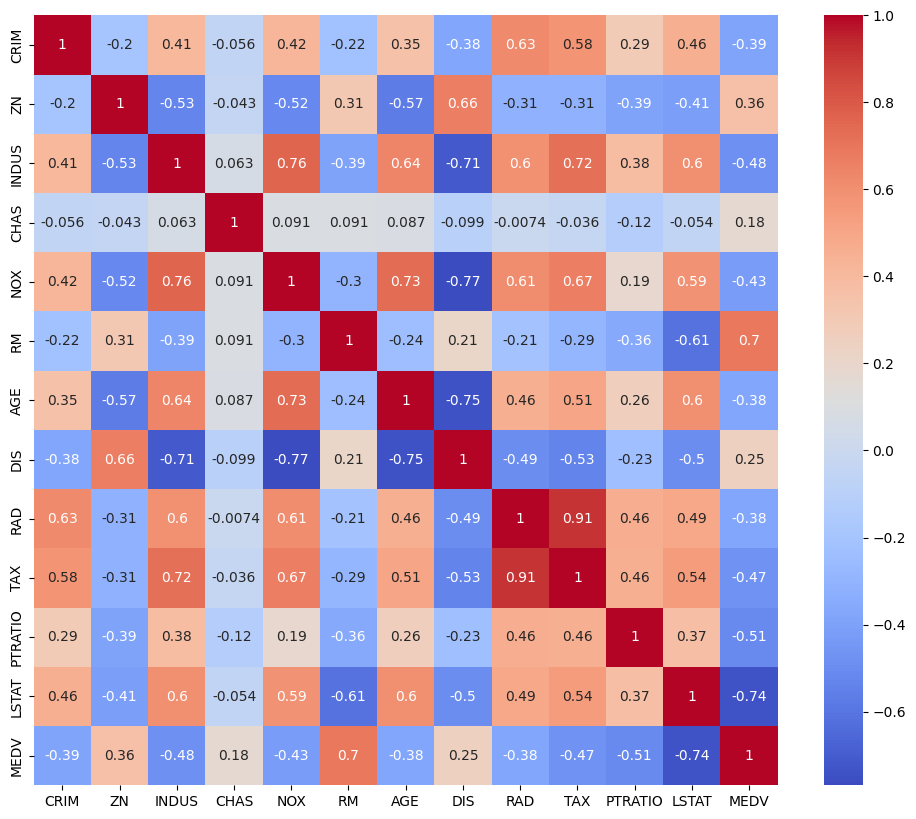

In [ ]:

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

✅ Variables más correlacionadas con MEDV (target):

📈 Correlación positiva (más alto = más caro):

RM → +0.70 → Más habitaciones → Más valor

ZN → +0.36 → Zonas residenciales grandes

CHAS → +0.18 → Río Charles (leve impacto)

📉 Correlación negativa (más alto = más barato):

LSTAT → –0.74 → Mayor % clase baja → Menor precio

PTRATIO → –0.51 → Más alumnos por maestro → Menor calidad

TAX → –0.47

INDUS → –0.38

NOX → –0.43

CRIM → –0.39

RAD → –0.38

AGE → –0.38

In [6]:
features = ['RM', 'LSTAT', 'PTRATIO', 'TAX', 'CRIM', 'NOX']
X = df[features]


In [7]:
# 6. Trata las variables para que funcionen lo mejor posible en el modelo
# NORMALIZACIÓN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustamos el escalador solo con los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 7. Construcción del modelo de regresión lineal
from sklearn.linear_model import LinearRegression

# Inicializamos y entrenamos el modelo
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Hacemos predicciones
y_pred = lr.predict(X_test_scaled)


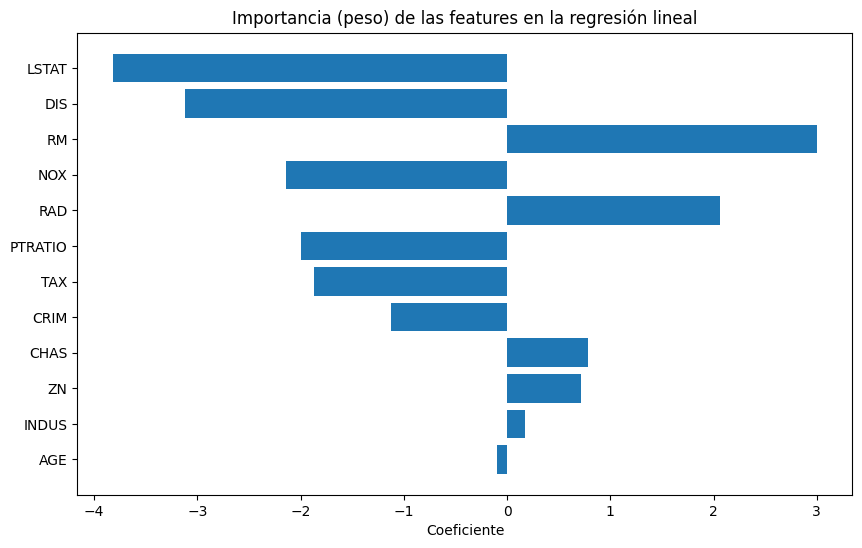

In [9]:
# 8. Importancia de features 
# Guardamos los coeficientes en un DataFrame
features = X_train.columns  # Asegúrate de que sea un DataFrame, no un array

coefs = pd.DataFrame({
    "Feature": features,
    "Coef": lr.coef_
}).sort_values(by="Coef", key=abs, ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(coefs["Feature"], coefs["Coef"])
plt.title("Importancia (peso) de las features en la regresión lineal")
plt.xlabel("Coeficiente")
plt.gca().invert_yaxis()
plt.show()

In [10]:
# 9. Evaluación del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


MAE:  3.11
MSE:  22.78
RMSE: 4.77
R²:   0.6894


MAE: 3.11 → En promedio, se equivoca unos 3.100 $k$ por casa (es decir, 3.110 $).

RMSE: 4.77 → Penaliza más los errores grandes. Un RMSE menor de 5 está bastante bien en este contexto.

R²: 0.6894 → El modelo explica casi un 69% de la variabilidad de los precios. No está mal, pero podría mejorar con regularización.

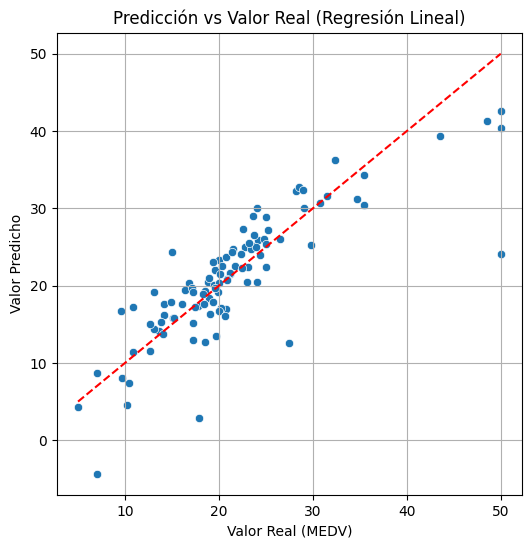

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valor Real (MEDV)")
plt.ylabel("Valor Predicho")
plt.title("Predicción vs Valor Real (Regresión Lineal)")
plt.grid(True)
plt.show()
